Imports:

In [ ]:
import pandas as pd

## Loading CSV and removing columns:

In [ ]:
air_emissions = pd.read_csv('air_emissions.csv')
columns_to_keep = ['TIME_PERIOD', 'Reference area', 'Economic activity', 'Measure', 'Unit of measure', 'OBS_VALUE']
air_emissions = air_emissions[columns_to_keep]

print(air_emissions.head())
# df_filtered.to_csv('filtered_data_aus.csv', index=False)

In [ ]:
activity_info = pd.read_csv('activity_info.csv')
columns_to_keep = ['TIME_PERIOD', 'Reference area', 'Economic activity', 'Measure', 'Unit of measure', 'OBS_VALUE']
activity_info = activity_info[columns_to_keep]

print(activity_info.head())

In [ ]:
env_tax = pd.read_csv('env_tax.csv')
columns_to_keep = ['TIME_PERIOD', 'Reference area', 'Economic activity', 'Unit of measure', 'OBS_VALUE']
env_tax = env_tax[columns_to_keep]

print(env_tax.head())

In [ ]:
green_growth = pd.read_csv('green_growth.csv')
columns_to_keep = ['TIME_PERIOD', 'Reference area', 'Measure', 'Unit of measure', 'OBS_VALUE']
green_growth = green_growth[columns_to_keep]

print(green_growth.head())

In [ ]:
policies = pd.read_csv('policies.csv')
columns_to_keep = ['TIME_PERIOD', 'Reference area', 'Climate actions and policies', 'Measure', 'OBS_VALUE']
policies = policies[columns_to_keep]

print(policies.head())

In [ ]:
# Combining the measure and unit of measure columns
air_emissions['Measure'] = air_emissions['Measure'] + ' (' + air_emissions['Unit of measure'] + ')'
activity_info['Measure'] = activity_info['Measure'] + ' (' + activity_info['Unit of measure'] + ')'
env_tax['Measure'] = 'Enviromental Taxes for activity' + ' (' + env_tax['Unit of measure'] + ')'
green_growth['Measure'] = green_growth['Measure'] + ' (' + green_growth['Unit of measure'] + ')'

In [ ]:
# Pivot each DataFrame individually
air_emissions_pivot = air_emissions.pivot_table(index=['TIME_PERIOD', 'Reference area', 'Economic activity'],
                                                columns='Measure',
                                                values='OBS_VALUE',
                                                aggfunc='first').reset_index()

activity_info_pivot = activity_info.pivot_table(index=['TIME_PERIOD', 'Reference area', 'Economic activity'],
                                                columns='Measure',
                                                values='OBS_VALUE',
                                                aggfunc='first').reset_index()

env_tax_pivot = env_tax.pivot_table(index=['TIME_PERIOD', 'Reference area', 'Economic activity'],
                                    columns='Measure',
                                    values='OBS_VALUE',
                                    aggfunc='first').reset_index()

# Merge the pivoted DataFrames on common columns
merged_df = pd.merge(air_emissions_pivot, activity_info_pivot, on=['TIME_PERIOD', 'Reference area', 'Economic activity'], how='outer')
merged_df = pd.merge(merged_df, env_tax_pivot, on=['TIME_PERIOD', 'Reference area', 'Economic activity'], how='outer')

# Display the merged DataFrame
print(merged_df.head())

Create feature columns:

In [ ]:
merged_df.to_csv('fat_data.csv', index=False)

In [ ]:
print(merged_df.shape)
merged_df = merged_df.dropna(subset=['Emissions (Tonnes of CO2-equivalent)'])
print(merged_df.shape)

(15165, 9)
(9122, 9)


In [ ]:
null_counts = merged_df.isnull().sum()

merged_df = merged_df.dropna(subset=['Output (National currency)'])
null_counts = merged_df.isnull().sum()

print(null_counts)

Measure
TIME_PERIOD                                         0
Reference area                                      0
Economic activity                                   0
Emissions (Tonnes of CO2-equivalent)                0
Compensation of employees (National currency)     243
Intermediate consumption (National currency)        2
Output (National currency)                          0
Value added (National currency)                     2
Enviromental Taxes for activity (US dollar)      2007
dtype: int64


In [ ]:
print(merged_df.shape)

(6558, 9)


In [ ]:
print(policies.head())

unique_activities = merged_df['Economic activity'].unique()

print(policies['Climate actions and policies'].unique())
# Print unique values
print(unique_activities)

   TIME_PERIOD Reference area          Climate actions and policies  \
0         1995         Canada  Transport - Market-based instruments   
1         1996         Canada  Transport - Market-based instruments   
2         1997         Canada  Transport - Market-based instruments   
3         1998         Canada  Transport - Market-based instruments   
4         1999         Canada  Transport - Market-based instruments   

             Measure  OBS_VALUE  
0  Policy stringency        0.2  
1  Policy stringency        0.2  
2  Policy stringency        0.2  
3  Policy stringency        0.2  
4  Policy stringency        0.2  
['Transport - Market-based instruments' 'GHG emission targets'
 'Buildings - Market-based instruments' 'Fossil fuel production policies'
 'Electricity - Market-based instruments' 'Cross-sectoral policies'
 'Industry - Market-based instruments' 'International policies'
 'Sectoral policies']
['Accommodation and food service activities'
 'Agriculture, forestry and fishi

In [ ]:
activity_to_policy = {
    'Accommodation and food service activities': 'Buildings - Market-based instruments',
    'Agriculture, forestry and fishing': 'Industry - Market-based instruments',
    'Arts, entertainment and recreation': 'Industry - Market-based instruments',
    'Construction': 'Buildings - Market-based instruments',
    'Electricity, gas, steam and air conditioning supply': 'Electricity - Market-based instruments',
    'Financial and insurance activities': 'Industry - Market-based instruments',
    'Information and communication': 'Industry - Market-based instruments',
    'Manufacturing': 'Industry - Market-based instruments',
    'Mining and quarrying': 'Industry - Market-based instruments',
    'Real estate activities': 'Buildings - Market-based instruments',
    'Transportation and storage': 'Transport - Market-based instruments',
    'Water supply; sewerage, waste management and remediation activities': 'Industry - Market-based instruments',
    'Wholesale and retail trade; repair of motor vehicles and motorcycles': 'Industry - Market-based instruments'
}

# Add a new column 'Sectoral Policies' based on the mapping
merged_df['Climate actions and policies'] = merged_df['Economic activity'].map(activity_to_policy)



In [ ]:
# Display the updated DataFrame
print(merged_df.head())

In [ ]:
merged_df = pd.merge(merged_df, policies[['TIME_PERIOD', 'Reference area', 'Climate actions and policies', 'OBS_VALUE']],
                     on=['TIME_PERIOD', 'Reference area', 'Climate actions and policies'],
                     how='left')
merged_df = merged_df.rename(columns={'Climate actions and policies': 'Sector', 'OBS_VALUE': 'Sectoral Policy Stringency'})

# Display the resulting merged DataFrame
print(merged_df.head())

In [ ]:
# Adding Non Sector policies

policies_pivot = policies.pivot_table(index=['TIME_PERIOD', 'Reference area'],
                                      columns='Climate actions and policies',
                                      values='OBS_VALUE',
                                      aggfunc='first').reset_index()
print(policies_pivot.head())

In [ ]:
columns_to_keep = ['TIME_PERIOD', 'Reference area', 'Cross-sectoral policies', 'International policies']
policies_pivot = policies_pivot[columns_to_keep]

In [ ]:
merged_df = pd.merge(merged_df, policies_pivot, on=['TIME_PERIOD', 'Reference area'], how='left')

In [ ]:
# Drop rows with null values in the 'Sectoral Policy Stringency' column
merged_df = merged_df.dropna(subset=['Sectoral Policy Stringency'])

# Print the resulting DataFrame
print(merged_df)

In [ ]:
merged_df.to_csv('fatter_data.csv', index=False)

# ML

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('fatter_data.csv')
df.dropna(inplace=True)

# Encode categorical variables
categorical_cols = ['Reference area', 'Economic activity', 'Sector']
df_encoded = pd.get_dummies(df, columns=categorical_cols)

### First Attempt

In [ ]:
# df = pd.read_csv('fatter_data.csv')
# df.dropna(inplace=True)

# # Encode categorical variables
# categorical_cols = ['Reference area', 'Economic activity', 'Sector']
# df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Extract features and target variable
X = df_encoded.drop(columns=['Emissions (Tonnes of CO2-equivalent)'])
y = df_encoded['Emissions (Tonnes of CO2-equivalent)']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"Training R^2 score: {train_score}")
print(f"Testing R^2 score: {test_score}")

# Extract coefficients for specified features
features_of_interest = ['Sectoral Policy Stringency', 'Cross-sectoral policies', 'International policies']
coefficients = {}
for feature in features_of_interest:
    coefficients[feature] = model.coef_[X.columns.get_loc(feature)]

# Display coefficients for each feature
print("\nCoefficients for specified features:")
for feature, coefficient in coefficients.items():
    print(f"{feature}: {coefficient}")

# Visualize coefficients for each sector
sectors = df['Sector'].unique()
for sector in sectors:
    sector_mask = df_encoded['Sector_' + sector] == 1
    sector_X = X[sector_mask]
    sector_y = y[sector_mask]

    sector_model = LinearRegression()
    sector_model.fit(sector_X, sector_y)

    sector_coefficients = {}
    for feature in features_of_interest:
        sector_coefficients[feature] = sector_model.coef_[sector_X.columns.get_loc(feature)]

    plt.bar(sector_coefficients.keys(), sector_coefficients.values())
    plt.title(f"Coefficients for {sector}")
    plt.xlabel("Feature")
    plt.ylabel("Coefficient")
    plt.show()

### Analysis

In [ ]:
# Assuming df is your DataFrame
# Get the column names

print(df.columns)

Index(['TIME_PERIOD', 'Reference area', 'Economic activity',
       'Emissions (Tonnes of CO2-equivalent)',
       'Compensation of employees (National currency)',
       'Intermediate consumption (National currency)',
       'Output (National currency)', 'Value added (National currency)',
       'Enviromental Taxes for activity (US dollar)', 'Sector',
       'Sectoral Policy Stringency', 'Cross-sectoral policies',
       'International policies'],
      dtype='object')


                                    Economic Activity   Coefficient
0           Accommodation and food service activities -1.329646e+05
1                   Agriculture, forestry and fishing  1.217221e+05
2                  Arts, entertainment and recreation -1.778071e+04
3                                        Construction -1.132413e+05
4   Electricity, gas, steam and air conditioning s... -8.749478e+05
5                  Financial and insurance activities -2.707074e+04
6                       Information and communication -3.442000e+04
7                                       Manufacturing  9.486123e+04
8                                Mining and quarrying -2.616126e+05
9                              Real estate activities -3.873285e+04
10                         Transportation and storage -1.675142e+06
11  Water supply; sewerage, waste management and r... -6.424893e+03
12  Wholesale and retail trade; repair of motor ve... -2.414028e+05


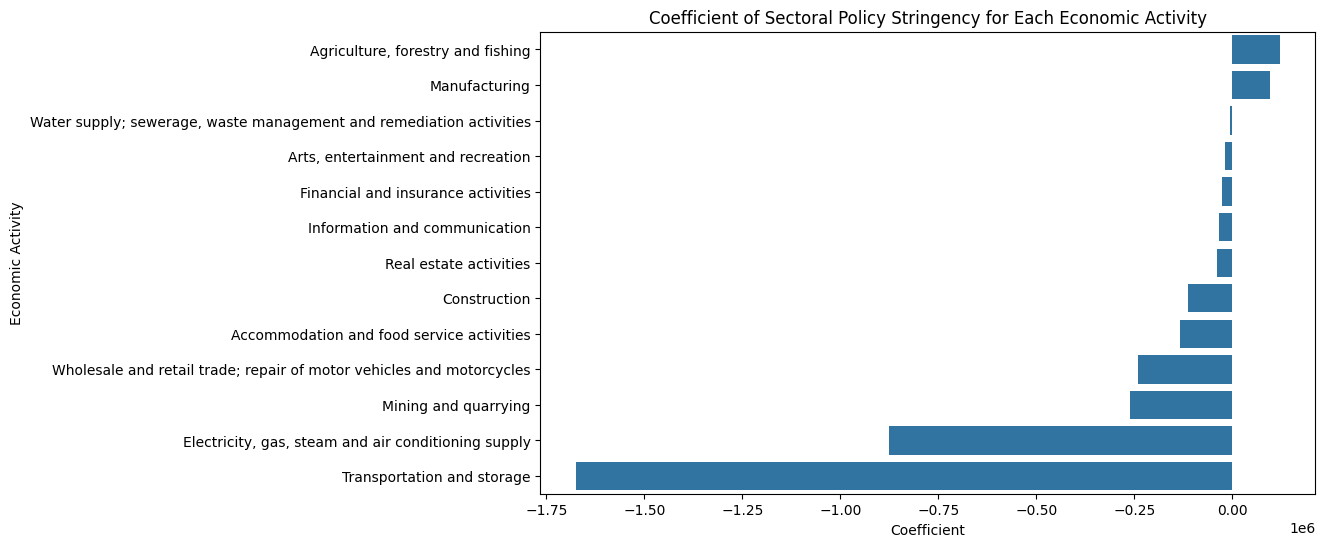

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Standardize the 'Sectoral Policy Stringency' variable
scaler = StandardScaler()

df_encoded['Sectoral Policy Stringency'] = scaler.fit_transform(df_encoded[['Sectoral Policy Stringency']])
economic_activities = df['Economic activity'].unique()
coefficients = []

for activity in economic_activities:
    # Filter the data for the current economic activity
    df_activity = df_encoded[df_encoded[f'Economic activity_{activity}'] == 1]

    # Define the variables
    X = df_activity.drop('Emissions (Tonnes of CO2-equivalent)', axis=1)
    y = df_activity['Emissions (Tonnes of CO2-equivalent)']

    # Define the model
    model = LinearRegression()

    # Fit the model
    model.fit(X, y)

    # Get the coefficient for 'Sectoral Policy Stringency'
    coef = model.coef_[list(X.columns).index('Sectoral Policy Stringency')]
    coefficients.append(coef)

# Create a dataframe of the coefficients
coef_df = pd.DataFrame({'Economic Activity': economic_activities, 'Coefficient': coefficients})
print(coef_df)
# Plot the coefficients
plt.figure(figsize=(10,6))
coef_df = coef_df.sort_values('Coefficient', ascending=False)
sns.barplot(x='Coefficient', y='Economic Activity', data=coef_df)
plt.title('Coefficient of Sectoral Policy Stringency for Each Economic Activity')
plt.show()

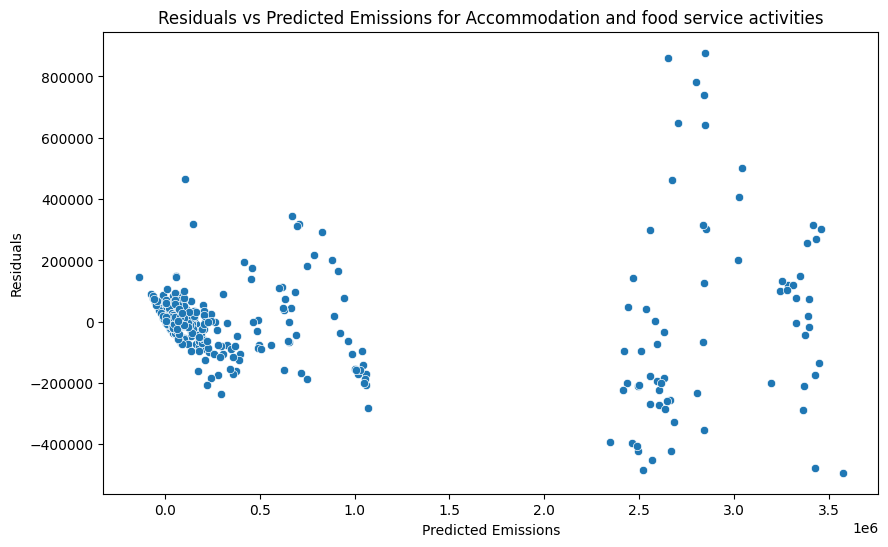

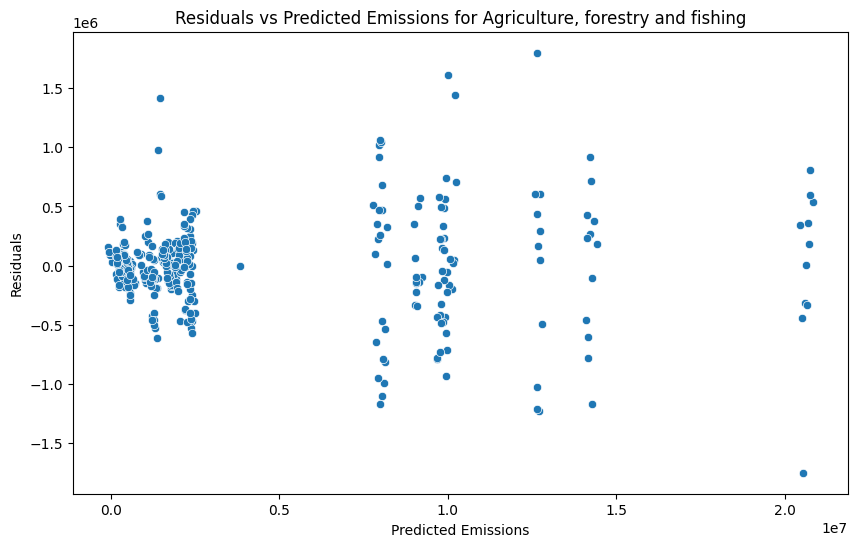

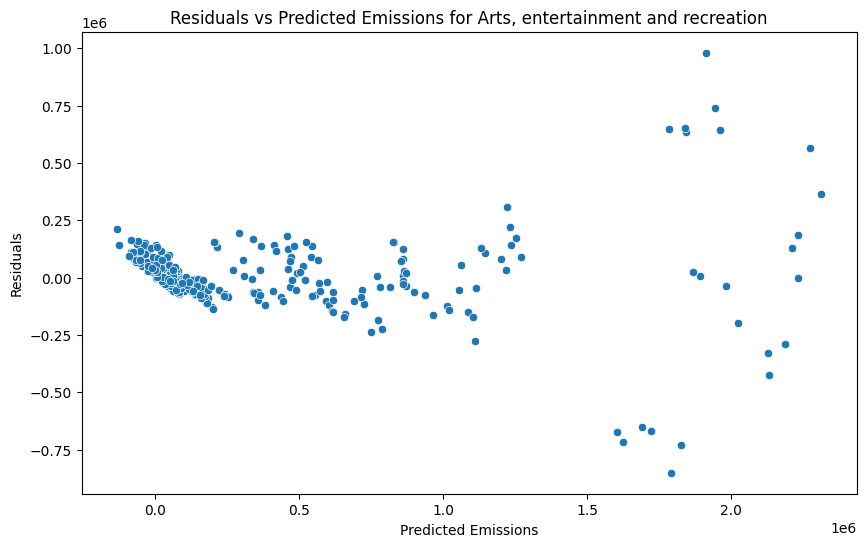

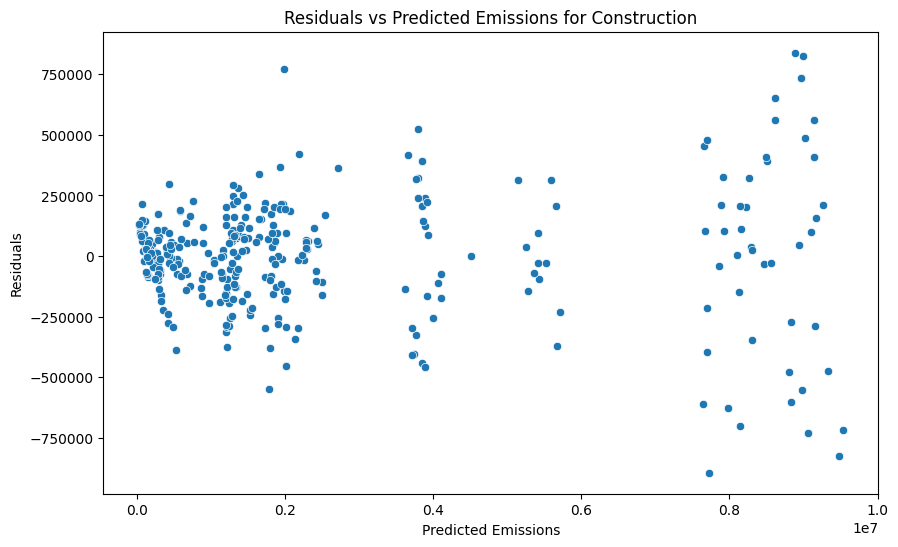

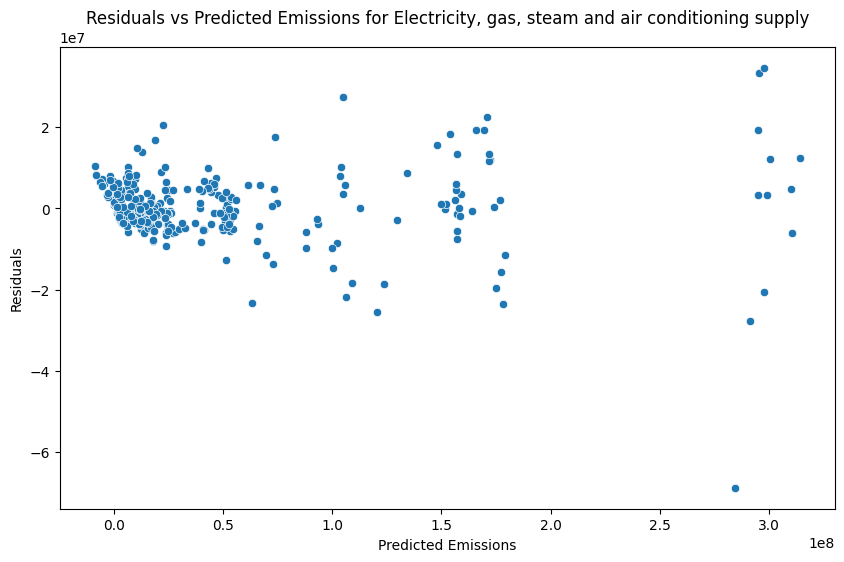

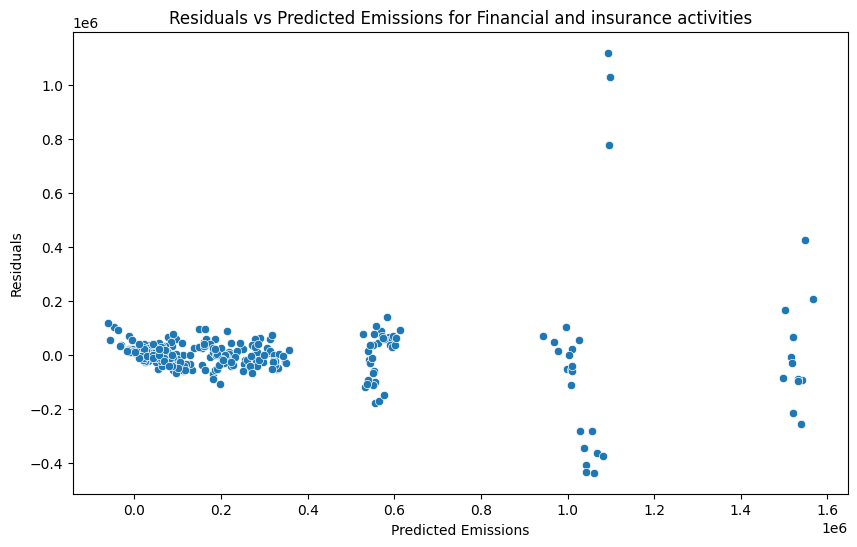

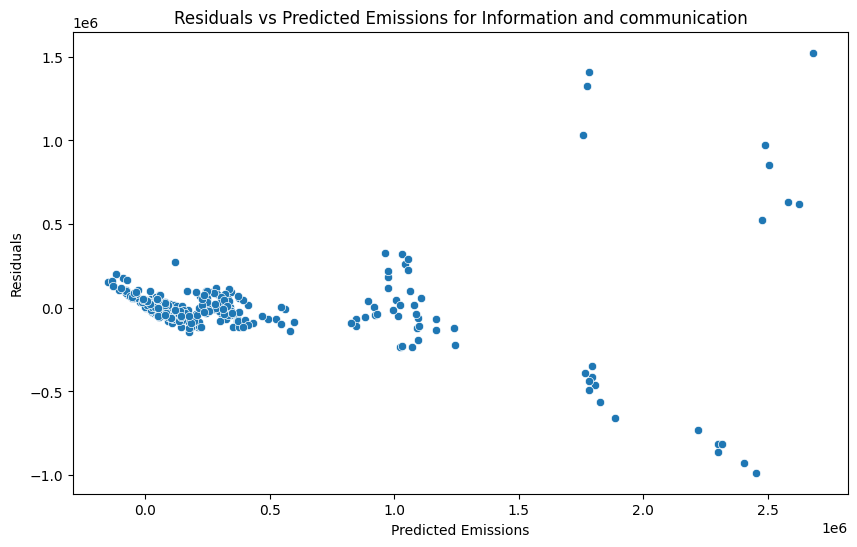

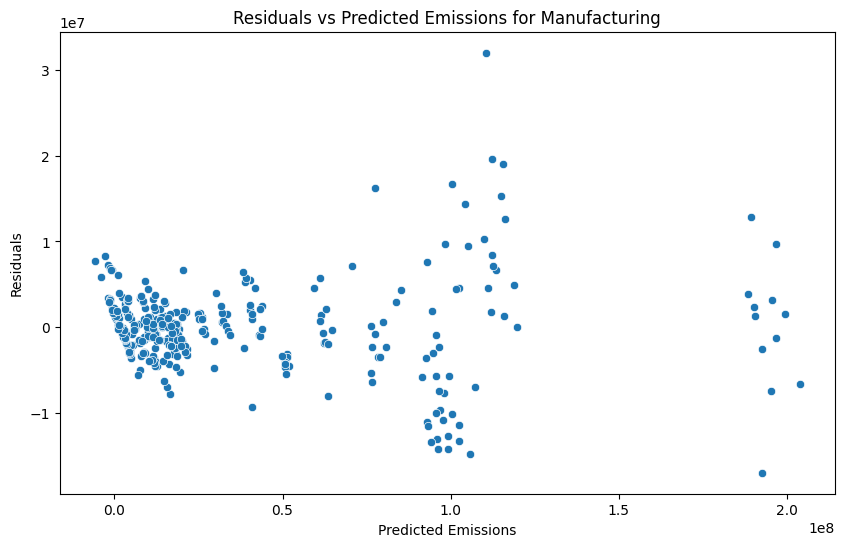

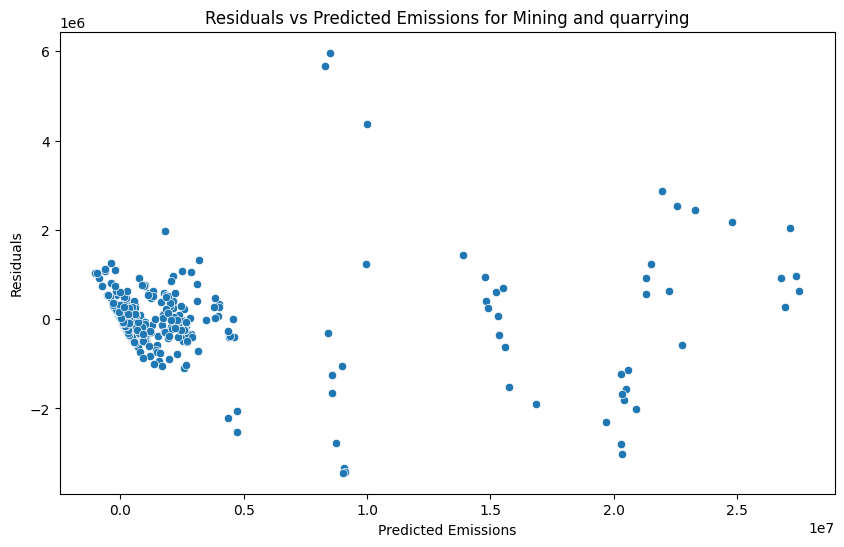

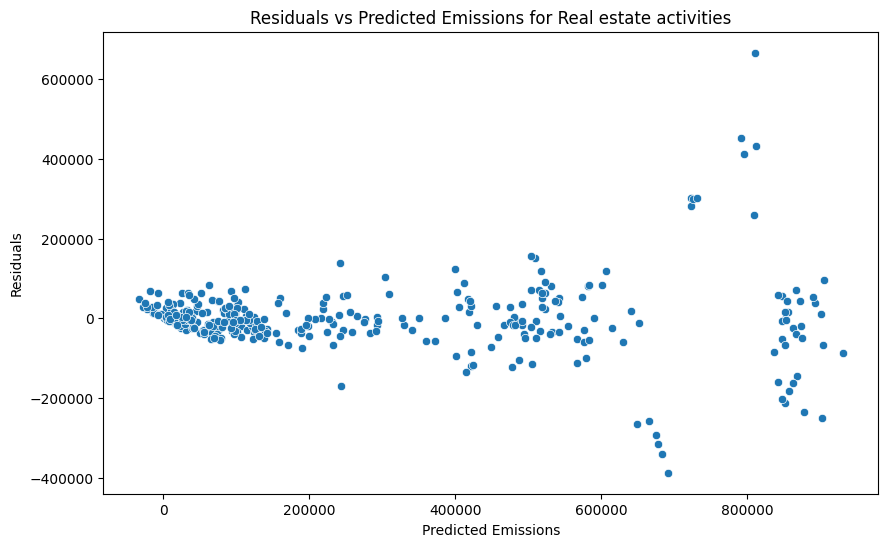

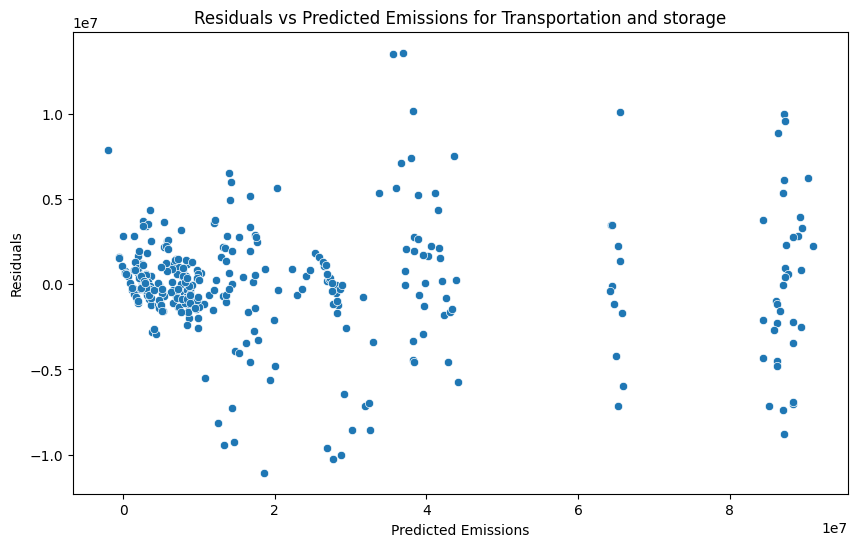

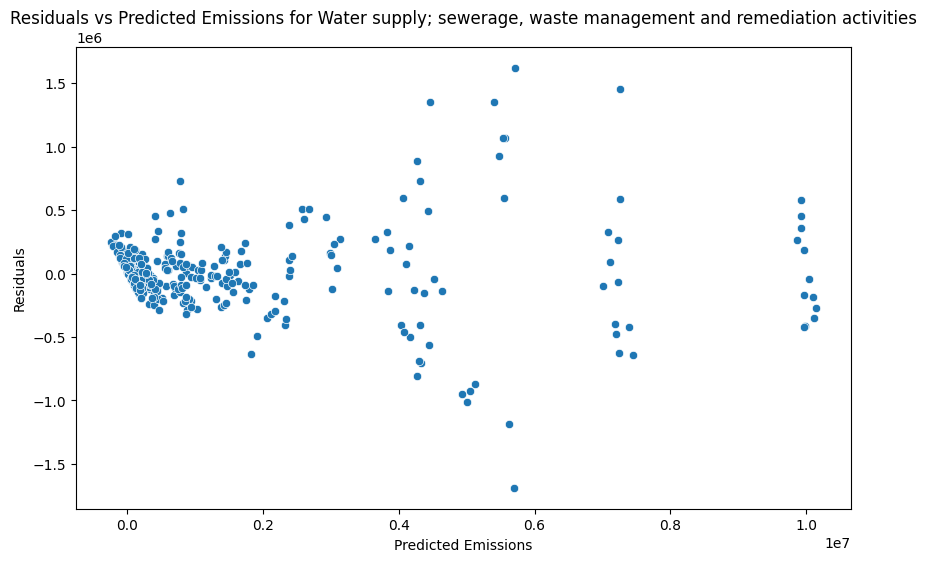

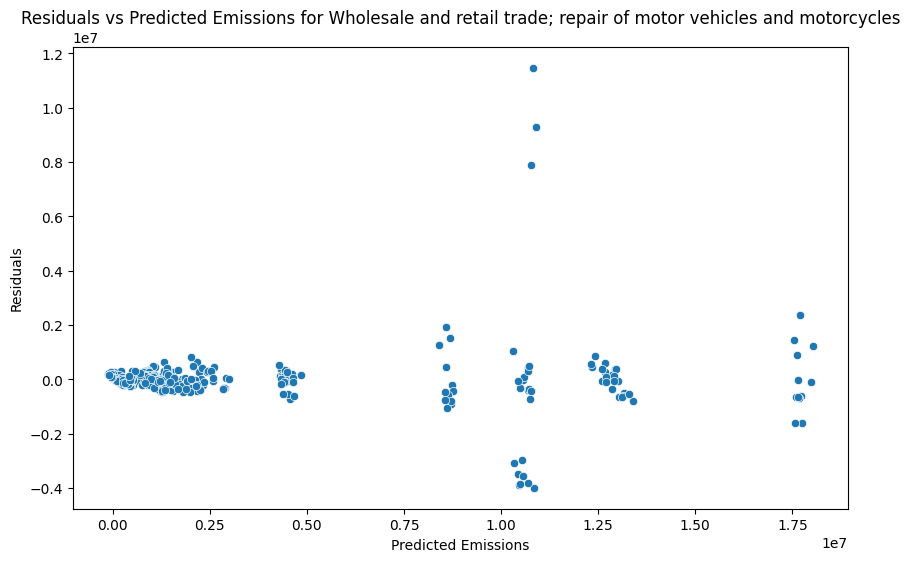

                                    Economic Activity   Coefficient  R-squared
0           Accommodation and food service activities -1.329646e+05   0.976168
1                   Agriculture, forestry and fishing  1.217221e+05   0.993707
2                  Arts, entertainment and recreation -1.778071e+04   0.915355
3                                        Construction -1.132413e+05   0.992579
4   Electricity, gas, steam and air conditioning s... -8.749478e+05   0.984933
5                  Financial and insurance activities -2.707074e+04   0.899251
6                       Information and communication -3.442000e+04   0.859647
7                                       Manufacturing  9.486123e+04   0.987342
8                                Mining and quarrying -2.616126e+05   0.977531
9                              Real estate activities -3.873285e+04   0.899690
10                         Transportation and storage -1.675142e+06   0.983883
11  Water supply; sewerage, waste management and r..

In [ ]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Standardize the 'Sectoral Policy Stringency' variable
scaler = StandardScaler()

df_encoded['Sectoral Policy Stringency'] = scaler.fit_transform(df_encoded[['Sectoral Policy Stringency']])

economic_activities = df['Economic activity'].unique()
coefficients = []
r2_scores = []

for activity in economic_activities:
    # Filter the data for the current economic activity
    df_activity = df_encoded[df_encoded[f'Economic activity_{activity}'] == 1]

    # Define the variables
    X = df_activity.drop('Emissions (Tonnes of CO2-equivalent)', axis=1)
    y = df_activity['Emissions (Tonnes of CO2-equivalent)']

    # Define the model
    model = LinearRegression()

    # Fit the model
    model.fit(X, y)

    # Get the coefficient for 'Sectoral Policy Stringency'
    coef = model.coef_[list(X.columns).index('Sectoral Policy Stringency')]
    coefficients.append(coef)

    # Predict the emissions
    y_pred = model.predict(X)

    # Calculate the R-squared score
    r2 = r2_score(y, y_pred)
    r2_scores.append(r2)

    # Plot the residuals
    residuals = y - y_pred
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.xlabel('Predicted Emissions')
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs Predicted Emissions for {activity}')
    plt.show()

# Create a dataframe of the coefficients and R-squared scores
results_df = pd.DataFrame({'Economic Activity': economic_activities, 'Coefficient': coefficients, 'R-squared': r2_scores})

# Display the results
print(results_df)

<ipython-input-20-c447a091a0f0>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agg = df.groupby('TIME_PERIOD').mean().reset_index()


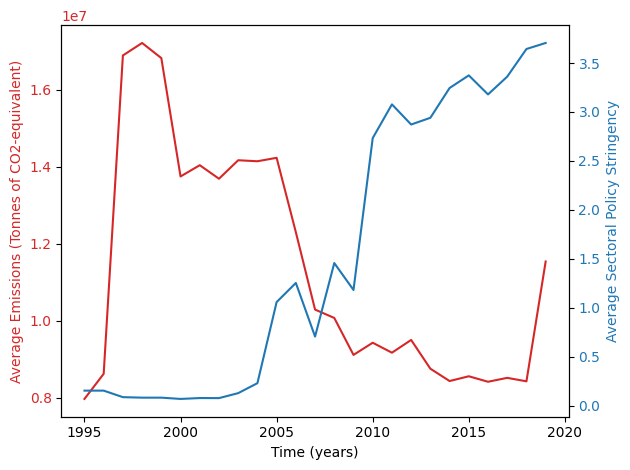

In [ ]:

import matplotlib.pyplot as plt

# Aggregate the data by taking the mean for each year
df_agg = df.groupby('TIME_PERIOD').mean().reset_index()

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time (years)')
ax1.set_ylabel('Average Emissions (Tonnes of CO2-equivalent)', color=color)
ax1.plot(df_agg['TIME_PERIOD'], df_agg['Emissions (Tonnes of CO2-equivalent)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Average Sectoral Policy Stringency', color=color)
ax2.plot(df_agg['TIME_PERIOD'], df_agg['Sectoral Policy Stringency'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()



In [ ]:
# Distribution of Emissions


import numpy as np

# Calculate the number of zeros
num_zeros = (df['Emissions (Tonnes of CO2-equivalent)'] == 0).sum()

# Calculate the mean, median, and quartiles
mean = df['Emissions (Tonnes of CO2-equivalent)'].mean()
median = df['Emissions (Tonnes of CO2-equivalent)'].median()
quartiles = df['Emissions (Tonnes of CO2-equivalent)'].quantile([0.25, 0.75]).values

# Create a dataframe to display the results
distribution_df = pd.DataFrame({
    'Number of Zeros': num_zeros,
    'Mean': mean,
    'Median': median,
    '1st Quartile': quartiles[0],
    '3rd Quartile': quartiles[1]
}, index=[0])

# Display the dataframe
print(distribution_df)

# Table 1: Summary Statistics of Emissions

# This table provides a summary of the distribution of emissions in the dataset. The 'Number of Zeros' row indicates that there are no data points with zero emissions. The 'Mean' row shows that the average emissions across all data points is approximately 9.68 million tonnes of CO2-equivalent. The 'Median' row shows that the middle value of emissions when sorted in ascending order is approximately 892,284 tonnes of CO2-equivalent, which is much lower than the mean, suggesting a right-skewed distribution. The '1st Quartile' and '3rd Quartile' rows show that 25% of the data points have emissions less than approximately 124,594 tonnes of CO2-equivalent, and 75% of the data points have emissions less than approximately 5.55 million tonnes of CO2-equivalent, respectively. The large difference between the mean and median, as well as the large difference between the 1st and 3rd quartiles, suggest a high variability in emissions.


   Number of Zeros          Mean     Median  1st Quartile  3rd Quartile
0                0  9.677711e+06  892284.41   124593.7375    5549769.03


<ipython-input-8-52620e0aa756>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Emissions (Tonnes of CO2-equivalent)', y='Economic activity', data=df, estimator=sum, ci=None)


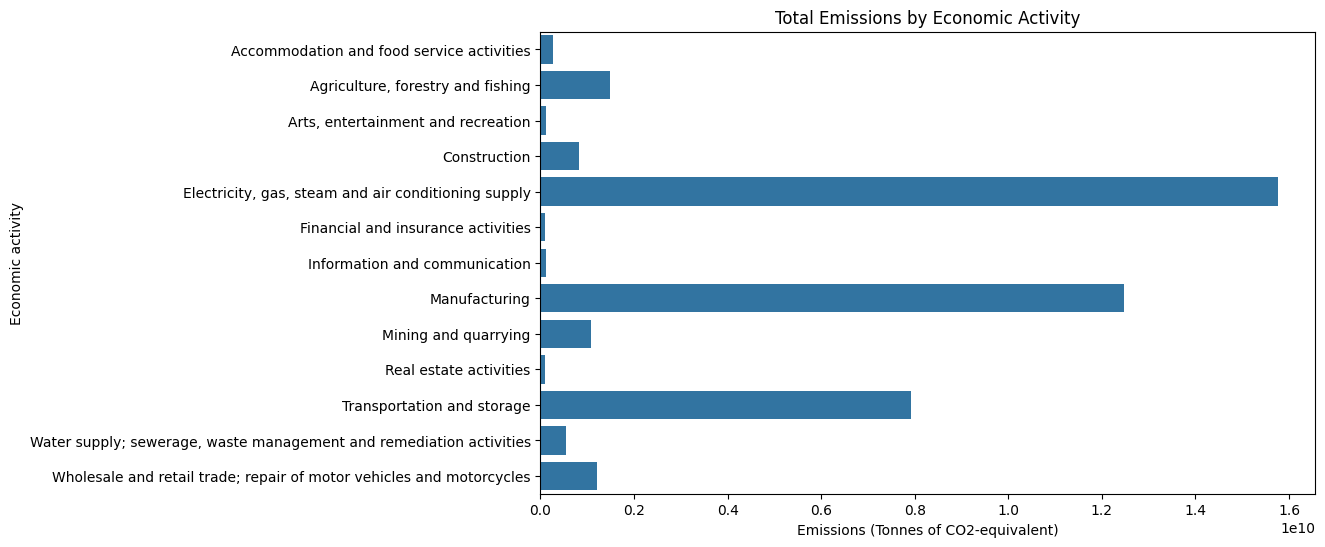

                                                   Economic activity  Emissions (Tonnes of CO2-equivalent)
                                  Financial and insurance activities                          9.192075e+07
                                              Real estate activities                          9.612043e+07
                                       Information and communication                          1.227346e+08
                                  Arts, entertainment and recreation                          1.233159e+08
                           Accommodation and food service activities                          2.618443e+08
 Water supply; sewerage, waste management and remediation activities                          5.419092e+08
                                                        Construction                          8.200701e+08
                                                Mining and quarrying                          1.091422e+09
Wholesale and retail trade; repair of

In [ ]:
# Emissions by Economic Activity


plt.figure(figsize=(10,6))
sns.barplot(x='Emissions (Tonnes of CO2-equivalent)', y='Economic activity', data=df, estimator=sum, ci=None)
plt.title('Total Emissions by Economic Activity')
plt.show()

# Assuming 'df' is your DataFrame
df_sum = df.groupby('Economic activity')['Emissions (Tonnes of CO2-equivalent)'].sum().reset_index()

# Sorting the data
df_sum_sorted = df_sum.sort_values(by='Emissions (Tonnes of CO2-equivalent)', ascending=True)
print(df_sum_sorted.to_string(index=False))



<ipython-input-9-bab447fc5627>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Emissions (Tonnes of CO2-equivalent)', y='Reference area', data=df, estimator=sum, ci=None)


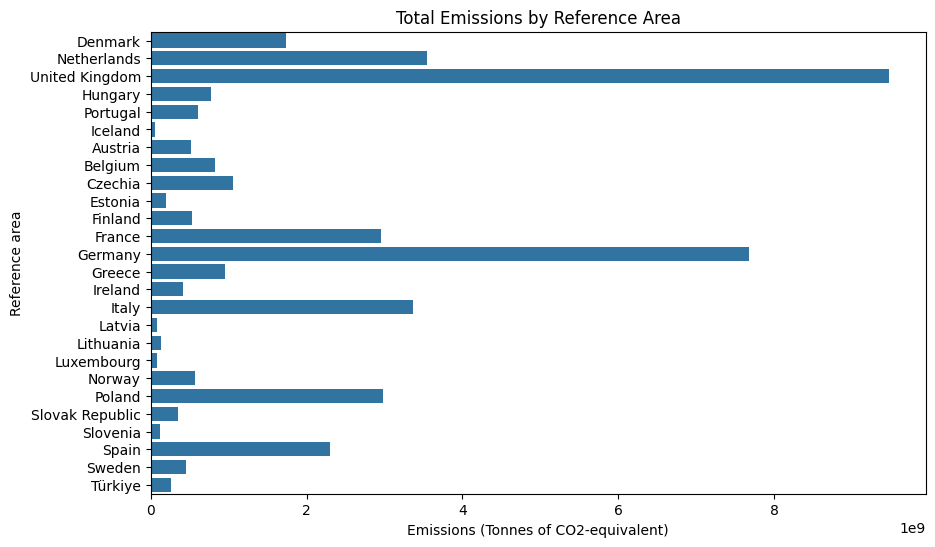

 Reference area  Emissions (Tonnes of CO2-equivalent)
        Iceland                          5.943279e+07
     Luxembourg                          7.728663e+07
         Latvia                          7.949331e+07
       Slovenia                          1.178386e+08
      Lithuania                          1.283606e+08
        Estonia                          1.967273e+08
        Türkiye                          2.624727e+08
Slovak Republic                          3.539086e+08
        Ireland                          4.126140e+08
         Sweden                          4.588258e+08
        Austria                          5.147946e+08
        Finland                          5.245784e+08
         Norway                          5.752656e+08
       Portugal                          6.023633e+08
        Hungary                          7.710664e+08
        Belgium                          8.306089e+08
         Greece                          9.537986e+08
        Czechia             

In [ ]:
# Emissions by Reference Area

plt.figure(figsize=(10,6))
sns.barplot(x='Emissions (Tonnes of CO2-equivalent)', y='Reference area', data=df, estimator=sum, ci=None)
plt.title('Total Emissions by Reference Area')
plt.show()

# Assuming 'df' is your DataFrame
df_sum = df.groupby('Reference area')['Emissions (Tonnes of CO2-equivalent)'].sum().reset_index()

# Sorting the data
df_sum_sorted = df_sum.sort_values(by='Emissions (Tonnes of CO2-equivalent)', ascending=True)
print(df_sum_sorted.to_string(index=False))

<ipython-input-27-0335dea22918>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sectoral Policy Stringency', y='Economic activity', data=df, ci=None)


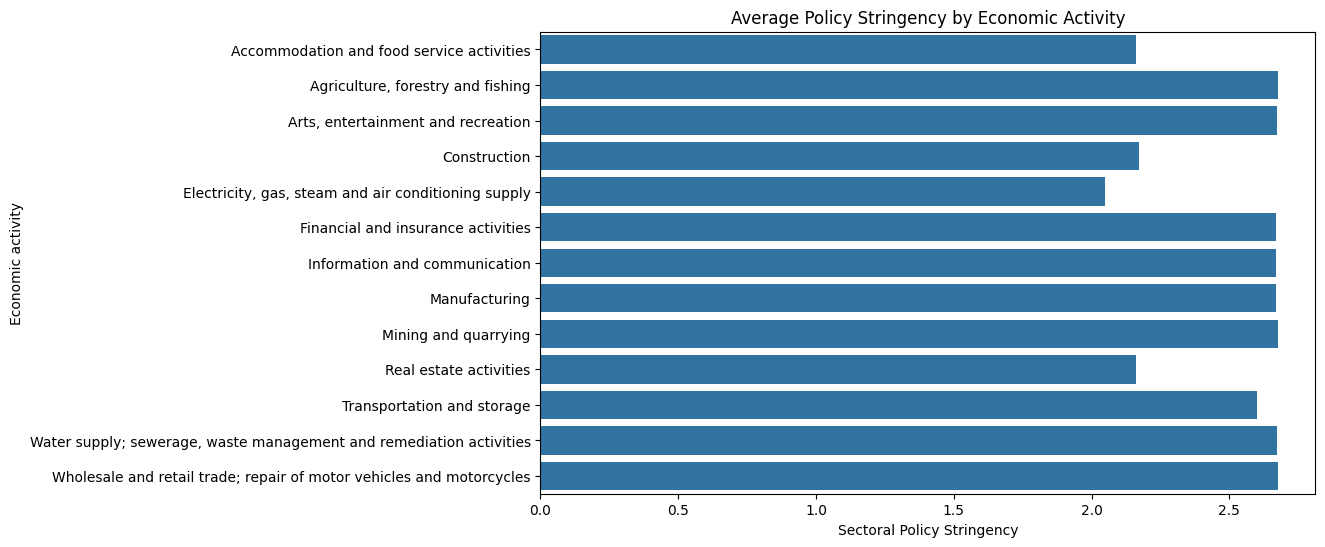

In [ ]:
# Policy Stringency by Economic Activity

plt.figure(figsize=(10,6))
sns.barplot(x='Sectoral Policy Stringency', y='Economic activity', data=df, ci=None)
plt.title('Average Policy Stringency by Economic Activity')
plt.show()

<ipython-input-28-9de1f5f99872>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')


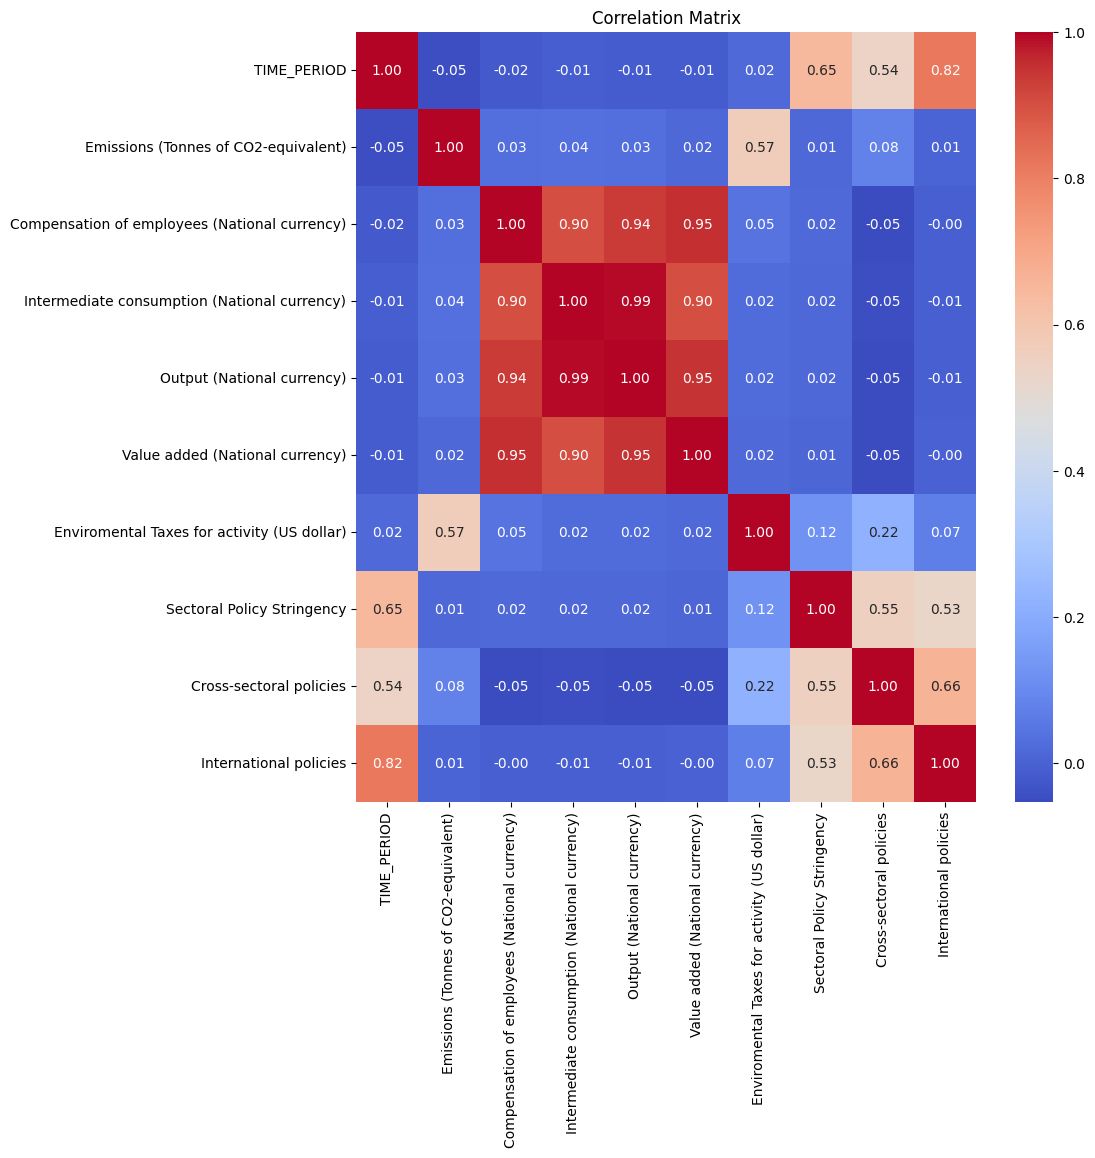

In [ ]:
# Correlation Matrix


plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

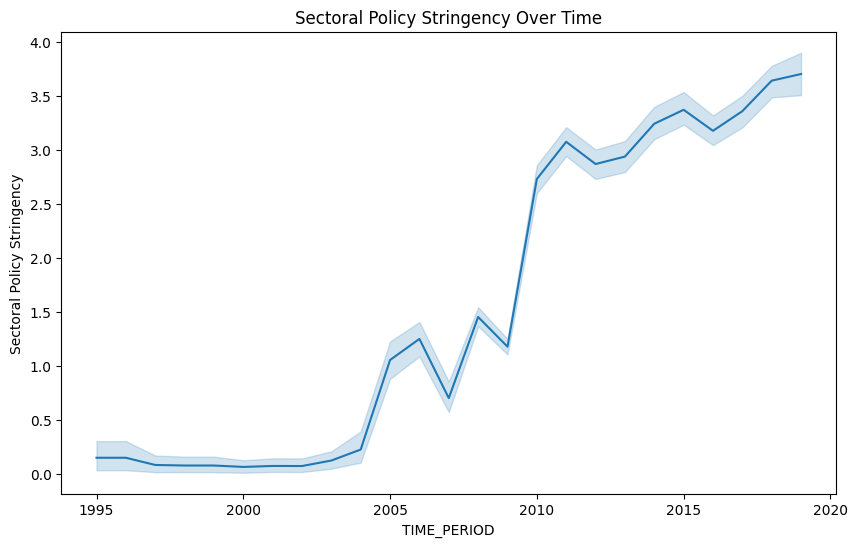

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
plt.figure(figsize=(10,6))
sns.lineplot(x='TIME_PERIOD', y='Sectoral Policy Stringency', data=df)
plt.title('Sectoral Policy Stringency Over Time')
plt.show()

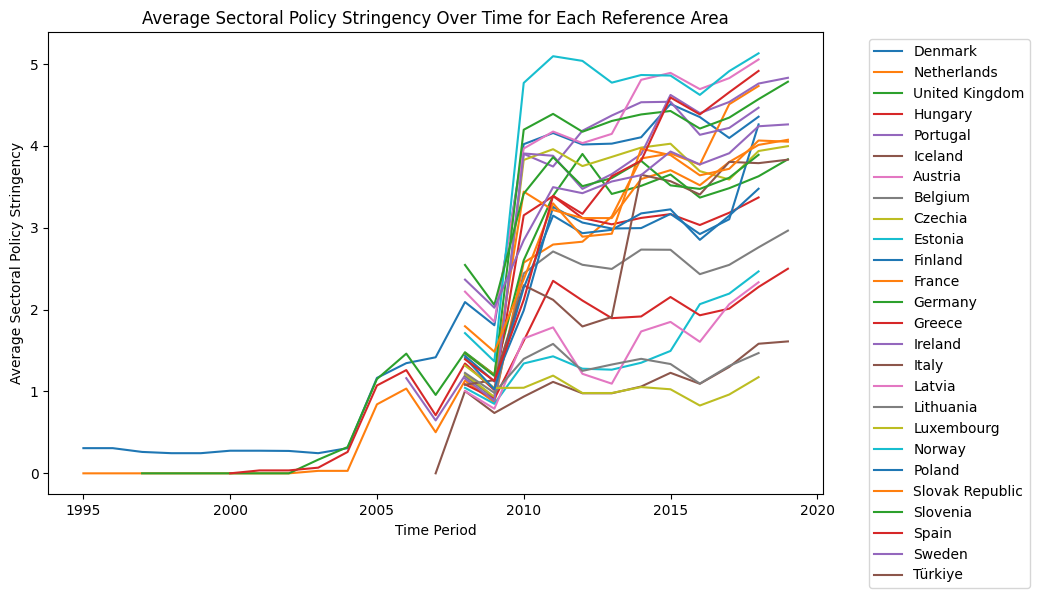

In [ ]:
import matplotlib.pyplot as plt

reference_areas = df['Reference area'].unique()

plt.figure(figsize=(10,6))

for area in reference_areas:
    df_area = df[df['Reference area'] == area]
    df_grouped = df_area.groupby('TIME_PERIOD')['Sectoral Policy Stringency'].mean()
    plt.plot(df_grouped.index, df_grouped.values, label=area)

plt.xlabel('Time Period')
plt.ylabel('Average Sectoral Policy Stringency')
plt.title('Average Sectoral Policy Stringency Over Time for Each Reference Area')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

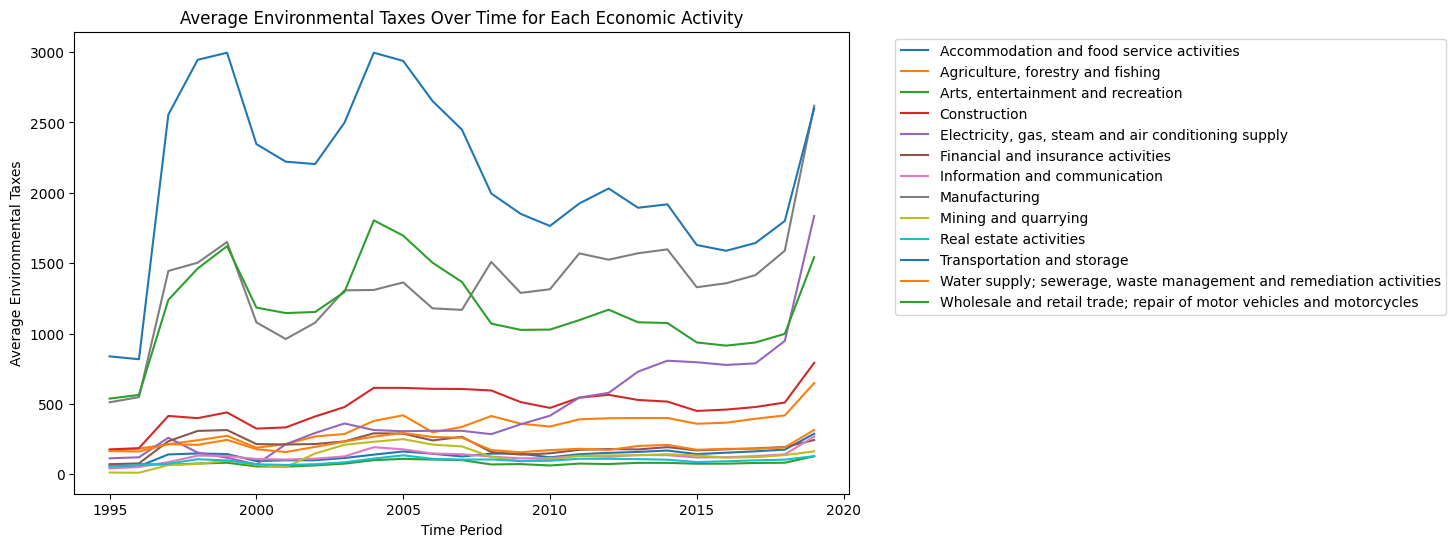

In [ ]:
economic_activities = df['Economic activity'].unique()

plt.figure(figsize=(10,6))

for activity in economic_activities:
    df_activity = df[df['Economic activity'] == activity]
    df_grouped = df_activity.groupby('TIME_PERIOD')['Enviromental Taxes for activity (US dollar)'].mean()
    plt.plot(df_grouped.index, df_grouped.values, label=activity)

plt.xlabel('Time Period')
plt.ylabel('Average Environmental Taxes')
plt.title('Average Environmental Taxes Over Time for Each Economic Activity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

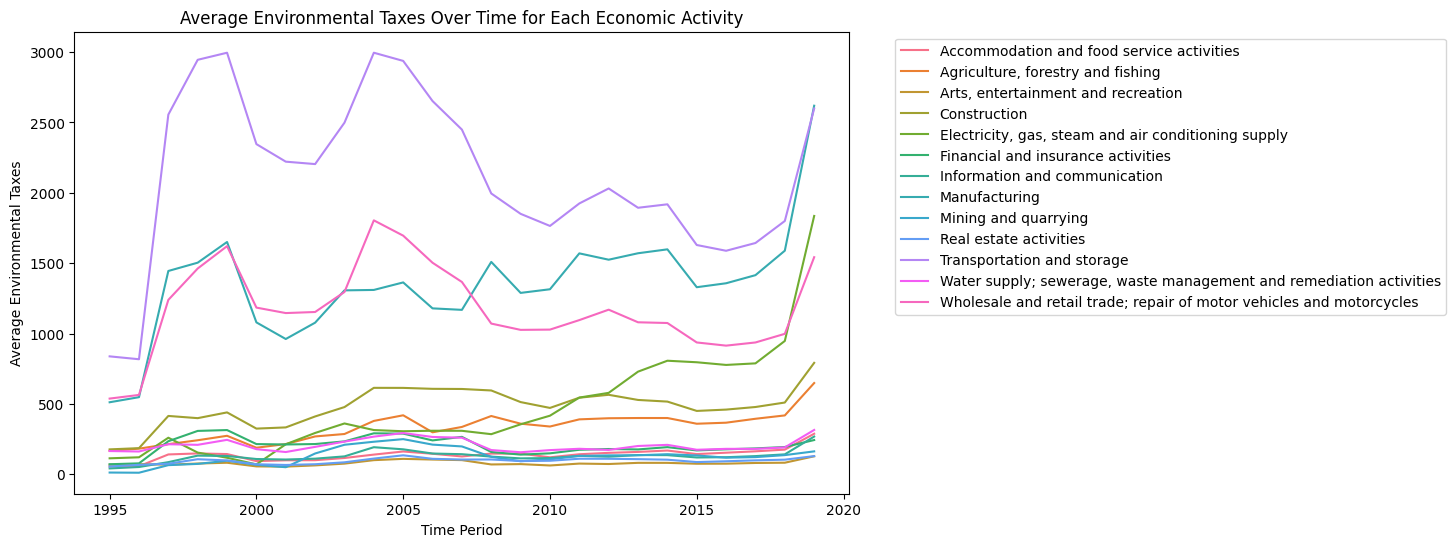

In [ ]:
import seaborn as sns

economic_activities = df['Economic activity'].unique()

# Create a color palette with as many colors as there are economic activities
palette = sns.color_palette('husl', len(economic_activities))

plt.figure(figsize=(10,6))

for i, activity in enumerate(economic_activities):
    df_activity = df[df['Economic activity'] == activity]
    df_grouped = df_activity.groupby('TIME_PERIOD')['Enviromental Taxes for activity (US dollar)'].mean()
    plt.plot(df_grouped.index, df_grouped.values, label=activity, color=palette[i])

plt.xlabel('Time Period')
plt.ylabel('Average Environmental Taxes')
plt.title('Average Environmental Taxes Over Time for Each Economic Activity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()